<a href="https://colab.research.google.com/github/serliputri/PCVK_Ganjil_2023/blob/main/Ser_PCVK_Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Menghubungkan dengan google drive**

In [1]:
from google.colab import drive

#Akses google drive
drive.mount('/content/drive')

Mounted at /content/drive


**install pytesseract**

In [2]:
!pip install pytesseract

**Import library**

In [3]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

**Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.**

1. Install PIP OCR

In [4]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 11 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 0s (17.0 MB/s)
debconf: unable to init

2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita tunjukan objek figure kita dengan method show()

Teks Hasil Pembacaan:
TN
PROVINSI DAERAH ISTIMEWA YOGYAKARTA

KABUPATEN SLEMAN
NIK > 3471140209790001
:RIVANTO. SE
Tempat/Tgl Lahr: GROBOGAN, 02-09-1979
JensKelgmn =: LAKHLAKI GolDarah :O
Alamat : PRM PURI DOMAS 0-3, SEMPU
RTRW 001/024

KelDesa :WEDOMARTANI
Kecamatan : NGEMPLAK
Agama ‘ISLAM
Status Perkawinan: KAWIN StF MAN
Pekernaan : PEDAGANG 05-06-2012
Kewarganegaraan: WNi
Berta Hingga = 02-09-2017

 



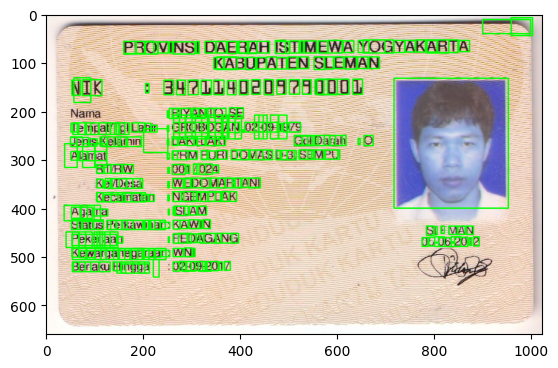

In [5]:
import cv2
import pytesseract
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Baca gambar dari file
image = cv2.imread('/content/drive/MyDrive/Bahan PCVK/KTP1.jpg')

# Langkah 1: Prapemrosesan gambar
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Peningkatan kontras
alpha = 1.5  # Sesuaikan nilai alpha sesuai kebutuhan
beta = 0     # Sesuaikan nilai beta sesuai kebutuhan
enhanced_image = cv2.convertScaleAbs(thresholded_image, alpha=alpha, beta=beta)

# Langkah 2: Deteksi teks pada gambar
detected_text = pytesseract.image_to_string(enhanced_image)

# Langkah 3: Menampilkan teks hasil pembacaan
print("Teks Hasil Pembacaan:")
print(detected_text)

# Tampilkan gambar dengan kotak deteksi teks (opsional)
h, w = enhanced_image.shape
boxes = pytesseract.image_to_boxes(enhanced_image)
for b in boxes.splitlines():
    b = b.split()
    x, y, x2, y2 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(image, (x, h - y), (x2, h - y2), (0, 255, 0), 2)

# Tampilkan gambar dengan kotak deteksi teks (opsional)
plt.imshow(image)
# plt.axis('off')
plt.show()